

```
# これはコードとして書式設定されます
```

SOM example modified from https://qiita.com/T_Shinaji/items/609fe9aabd99c287b389

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class SOM():

    def __init__(self, teachers, N, seed=None):
        self.teachers = np.array(teachers)
        self.n_teacher = self.teachers.shape[0]
        self.N = N
        if not seed is None:
            np.random.seed(seed)

        x, y = np.meshgrid(range(self.N), range(self.N))
        self.c = np.hstack((y.flatten()[:, np.newaxis],
                            x.flatten()[:, np.newaxis]))
        self.nodes = np.random.rand(self.N*self.N,
                                    self.teachers.shape[1])

    def train(self):
        for i, teacher in enumerate(self.teachers):
            bmu = self._best_matching_unit(teacher)
            d = np.linalg.norm(self.c - bmu, axis=1)
            L = self._learning_ratio(i)
            S = self._learning_radius(i, d)
            self.nodes += L * S[:, np.newaxis] * (teacher - self.nodes)
        return self.nodes

    def _best_matching_unit(self, teacher):
        #compute all norms (square)
        norms = np.linalg.norm(self.nodes - teacher, axis=1)
        bmu = np.argmin(norms) #argment with minimum element 
        return np.unravel_index(bmu,(self.N, self.N))

    def _neighbourhood(self, t):#neighbourhood radious
        halflife = float(self.n_teacher/4) #for testing
        initial  = float(self.N/2)
        return initial*np.exp(-t/halflife)

    def _learning_ratio(self, t):
        halflife = float(self.n_teacher/4) #for testing
        initial  = 0.1
        return initial*np.exp(-t/halflife)

    def _learning_radius(self, t, d):
        # d is distance from BMU
        s = self._neighbourhood(t)
        return np.exp(-d**2/(2*s**2))


In [3]:
N = 20        
teachers = np.random.rand(10000, 3)
som = SOM(teachers, N=N, seed=10)

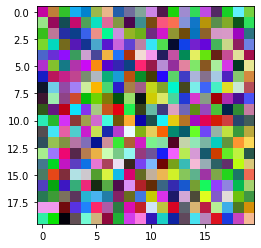

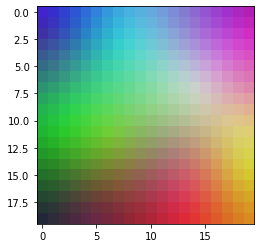

In [4]:
# Initial map
plt.imshow(som.nodes.reshape((N, N, 3)),
           interpolation='none')
plt.show()

# Train
som.train()

# Trained MAP
plt.imshow(som.nodes.reshape((N, N, 3)),
           interpolation='none')
plt.show()      